In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
fd = pd.read_csv(r'archive\fraud.csv')

In [14]:
fd=fd.drop(columns=['isFlaggedFraud'])

In [15]:
fd.columns= ["step", "type", "amount", "customer_starting_transaction", "bal_before_transaction", 
            "bal_after_transaction", "recipient_of_transaction", "bal_of_recepient_before_transaction", "bal_of_receipient_after_transaction", "fraud_transaction"]



In [16]:
fd.head()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [17]:
fd.tail()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


In [18]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   step                                 int64  
 1   type                                 object 
 2   amount                               float64
 3   customer_starting_transaction        object 
 4   bal_before_transaction               float64
 5   bal_after_transaction                float64
 6   recipient_of_transaction             object 
 7   bal_of_recepient_before_transaction  float64
 8   bal_of_receipient_after_transaction  float64
 9   fraud_transaction                    int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [19]:
fd.describe()

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [20]:
fd.describe().astype(int)

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction
count,6362620,6362620,6362620,6362620,6362620,6362620,6362620
mean,243,179861,833883,855113,1100701,1224996,0
std,142,603858,2888242,2924048,3399180,3674128,0
min,1,0,0,0,0,0,0
25%,156,13389,0,0,0,0,0
50%,239,74871,14208,0,132705,214661,0
75%,335,208721,107315,144258,943036,1111909,0
max,743,92445516,59585040,49585040,356015889,356179278,1


In [21]:
fd.isnull()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False


In [22]:
fd.isnull().sum()

step                                   0
type                                   0
amount                                 0
customer_starting_transaction          0
bal_before_transaction                 0
bal_after_transaction                  0
recipient_of_transaction               0
bal_of_recepient_before_transaction    0
bal_of_receipient_after_transaction    0
fraud_transaction                      0
dtype: int64

<Axes: title={'center': 'missing data visualization in the dataset'}>

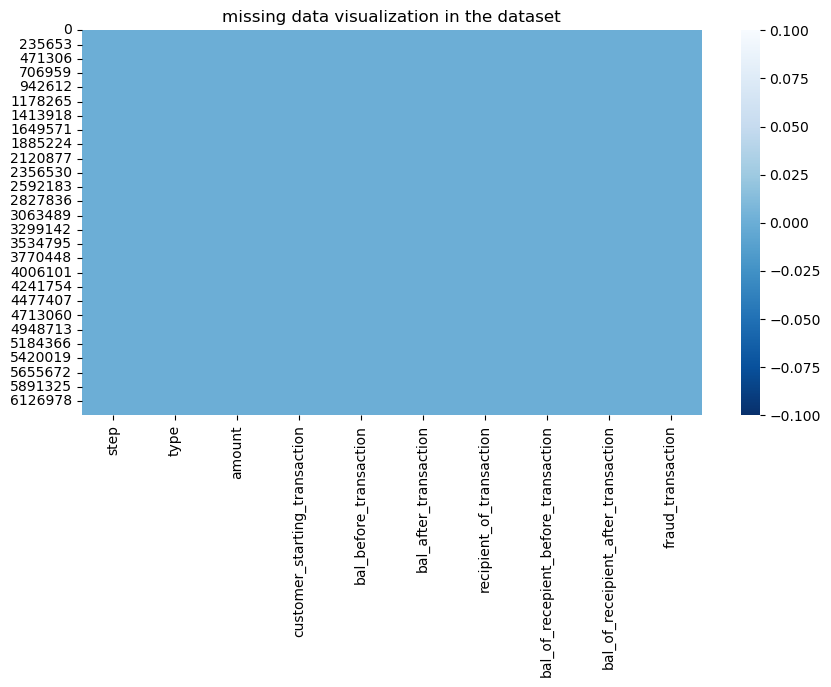

In [23]:
plt.figure(figsize = (10,5))
plt.title ("missing data visualization in the dataset")
sns.heatmap(fd.isnull(), cbar =True, cmap= "Blues_r")

### There is no missing values in the dataset

In [24]:
fd.shape

(6362620, 10)

### We have 6362620 rows and 10 columns in the dataset

### EXPLORATORY DATA ANALYSIS

Univariate Analysis

Bivariate Analysis

Multivariate Analysis

Correlation


Text(0, 0.5, 'count of online transaction type ')

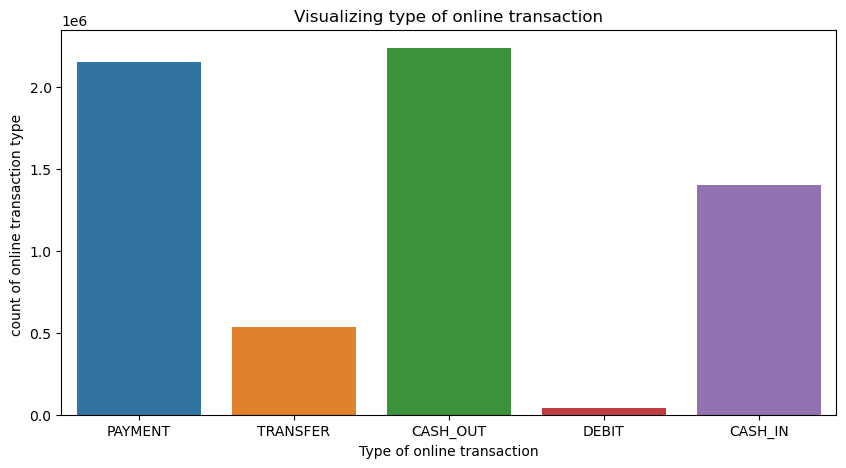

In [25]:
plt.figure(figsize=(10,5))
sns.countplot (x="type", data= fd)
plt.title ("Visualizing type of online transaction")
plt.xlabel("Type of online transaction")
plt.ylabel("count of online transaction type ")

#### From the chart, it is seen that cash_out and payment  is the most common type of online transaction that customers use 

In [ ]:
def Fraud (x):
    if x ==1:
        return "Fraudulent"
    else:
        return "not Fraudulent"
    
fd["fraud_transaction_label"] = fd["fraud_transaction"].apply(Fraud)

<Axes: title={'center': 'Fraudulent Transactions'}, ylabel='fraud_transaction_label'>

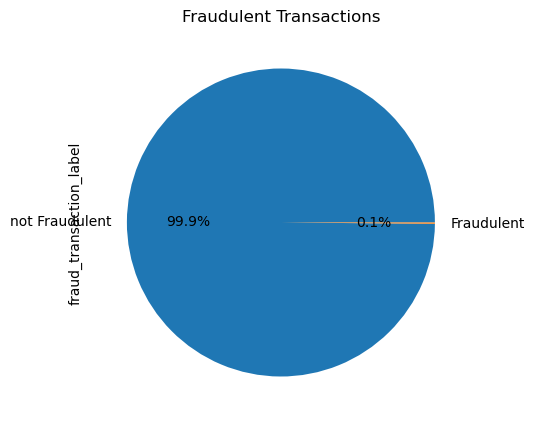

In [26]:
plt.figure(figsize = (10,5))
plt.title ("Fraudulent Transactions")
fd.fraud_transaction_label.value_counts().plot.pie(autopct='%1.1f%%')


#### From this chart, its shows that most of the online transactions customers does is not fraudulent. Also the dataset is not balance

In [27]:
fd.fraud_transaction_label.value_counts()

not Fraudulent    6354407
Fraudulent           8213
Name: fraud_transaction_label, dtype: int64

#### 8213 transactions have been tagged as fraudulent in the dataset, which is approximately 13% of the total number of transactions.

<Axes: xlabel='step', ylabel='Density'>

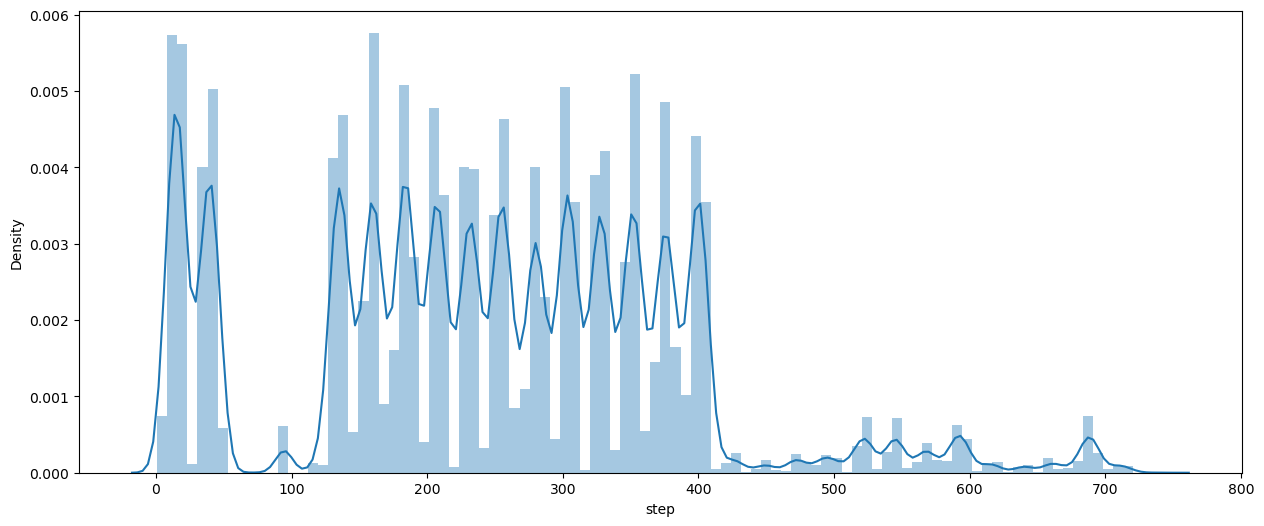

In [29]:
#To disable warnings
import warnings
warnings.filterwarnings("ignore")

# Visualization for step column

plt.figure(figsize=(15,6))
sns.distplot(fd['step'],bins=100)

#### The above graph indicates the distribution of the step column

<Axes: xlabel='amount', ylabel='Count'>

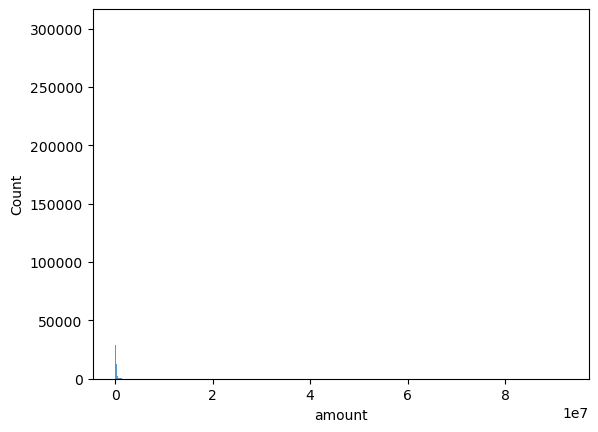

In [30]:
sns.histplot(x= "amount", data =fd)

In [31]:
fd.head()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,fraud_transaction_label
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,not Fraudulent
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,not Fraudulent
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraudulent
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraudulent
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,not Fraudulent


In [32]:
fd.tail()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,fraud_transaction_label
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,Fraudulent
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,Fraudulent
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,Fraudulent
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,Fraudulent
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,Fraudulent


<Axes: xlabel='type', ylabel='amount'>

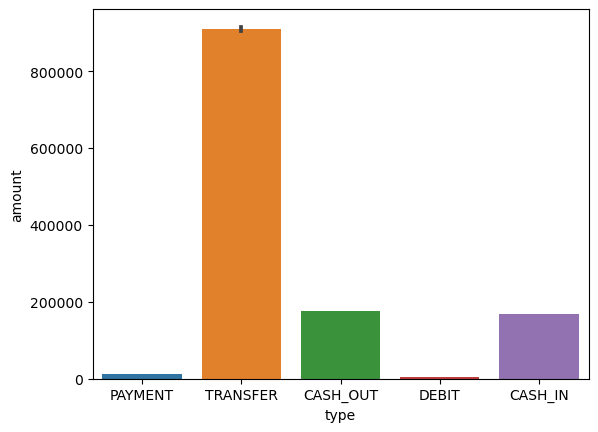

In [33]:
sns.barplot(x='type',y='amount',data=fd)

#### In this chart,  'transfer' type has the maximum amount of money being transfered from customers to the recipient. Although 'cash out' and 'payment' are the most common type of transactions

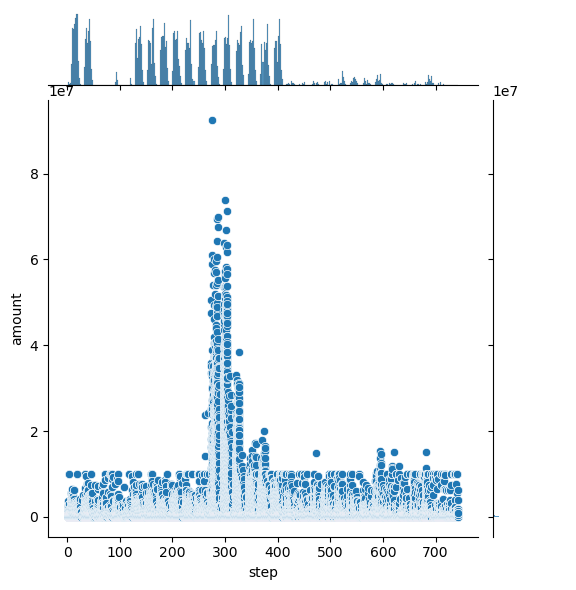

In [34]:
sns.jointplot(x='step',y='amount',data=fd)

<Axes: xlabel='amount', ylabel='step'>

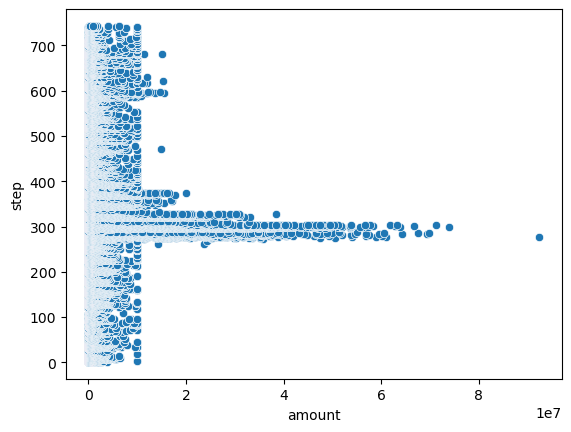

In [35]:
sns.scatterplot(x=fd["amount"], y=fd["step"])

Text(0, 0.5, 'fraud_transaction_label')

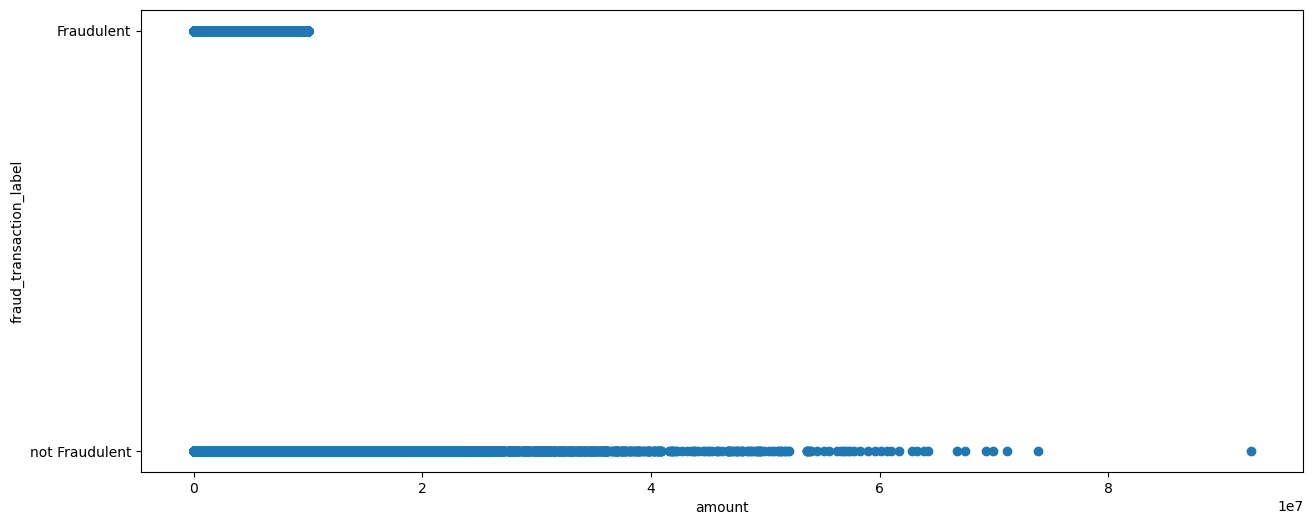

In [36]:
plt.figure(figsize=(15,6))
plt.scatter(x='amount',y='fraud_transaction_label',data=fd)
plt.xlabel('amount')
plt.ylabel('fraud_transaction_label')

#### Although the amount of fraudulent transactions is very low, majority of them are constituted within 0 and 10,000,000 amount.

Text(0, 0.5, 'fraud_transaction_label')

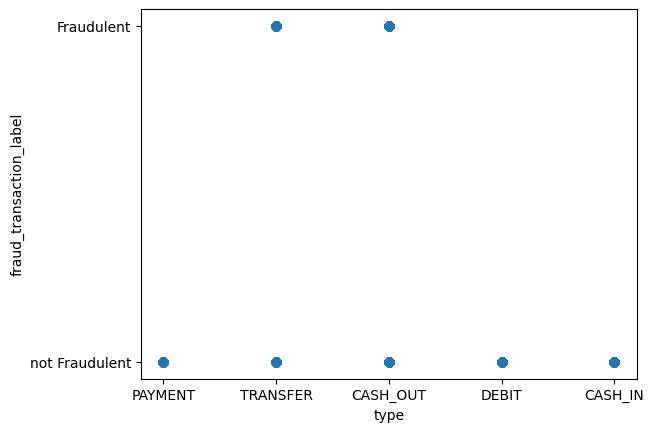

In [37]:
plt.scatter(x='type',y='fraud_transaction_label',data=fd)
plt.xlabel('type')
plt.ylabel('fraud_transaction_label')

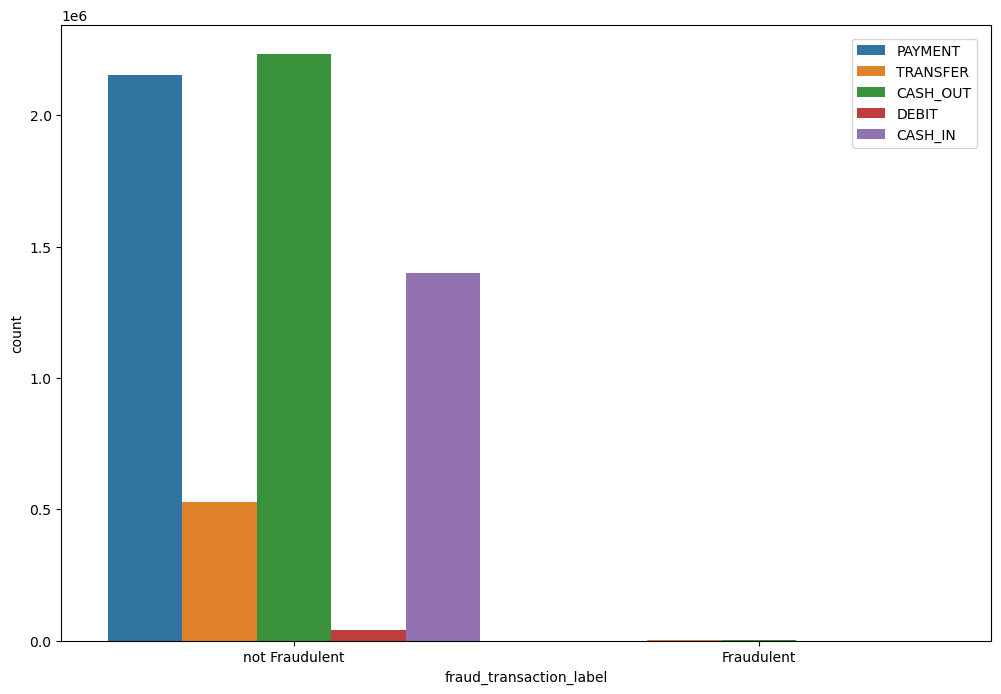

In [38]:
plt.figure(figsize=(12,8))
sns.countplot(x='fraud_transaction_label',data=fd,hue='type')
plt.legend(loc=[0.85,0.8])

#### Both the above graphs indicate that transactions of the type 'transfer' and 'cash out' comprise fraudulent transactions

## Multivariate Analysis

<Axes: xlabel='type', ylabel='step'>

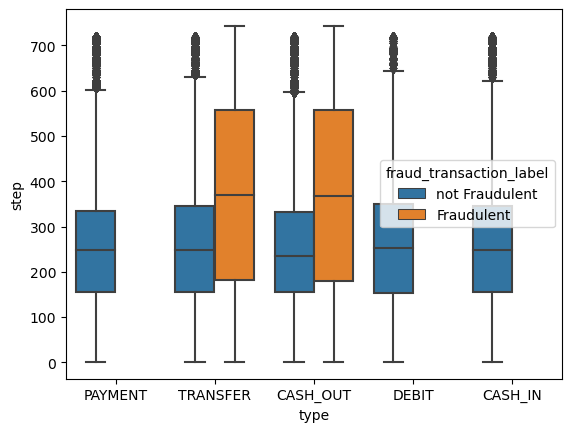

In [39]:
sns.boxplot(x= "type", y= "step", hue ="fraud_transaction_label", data= fd)

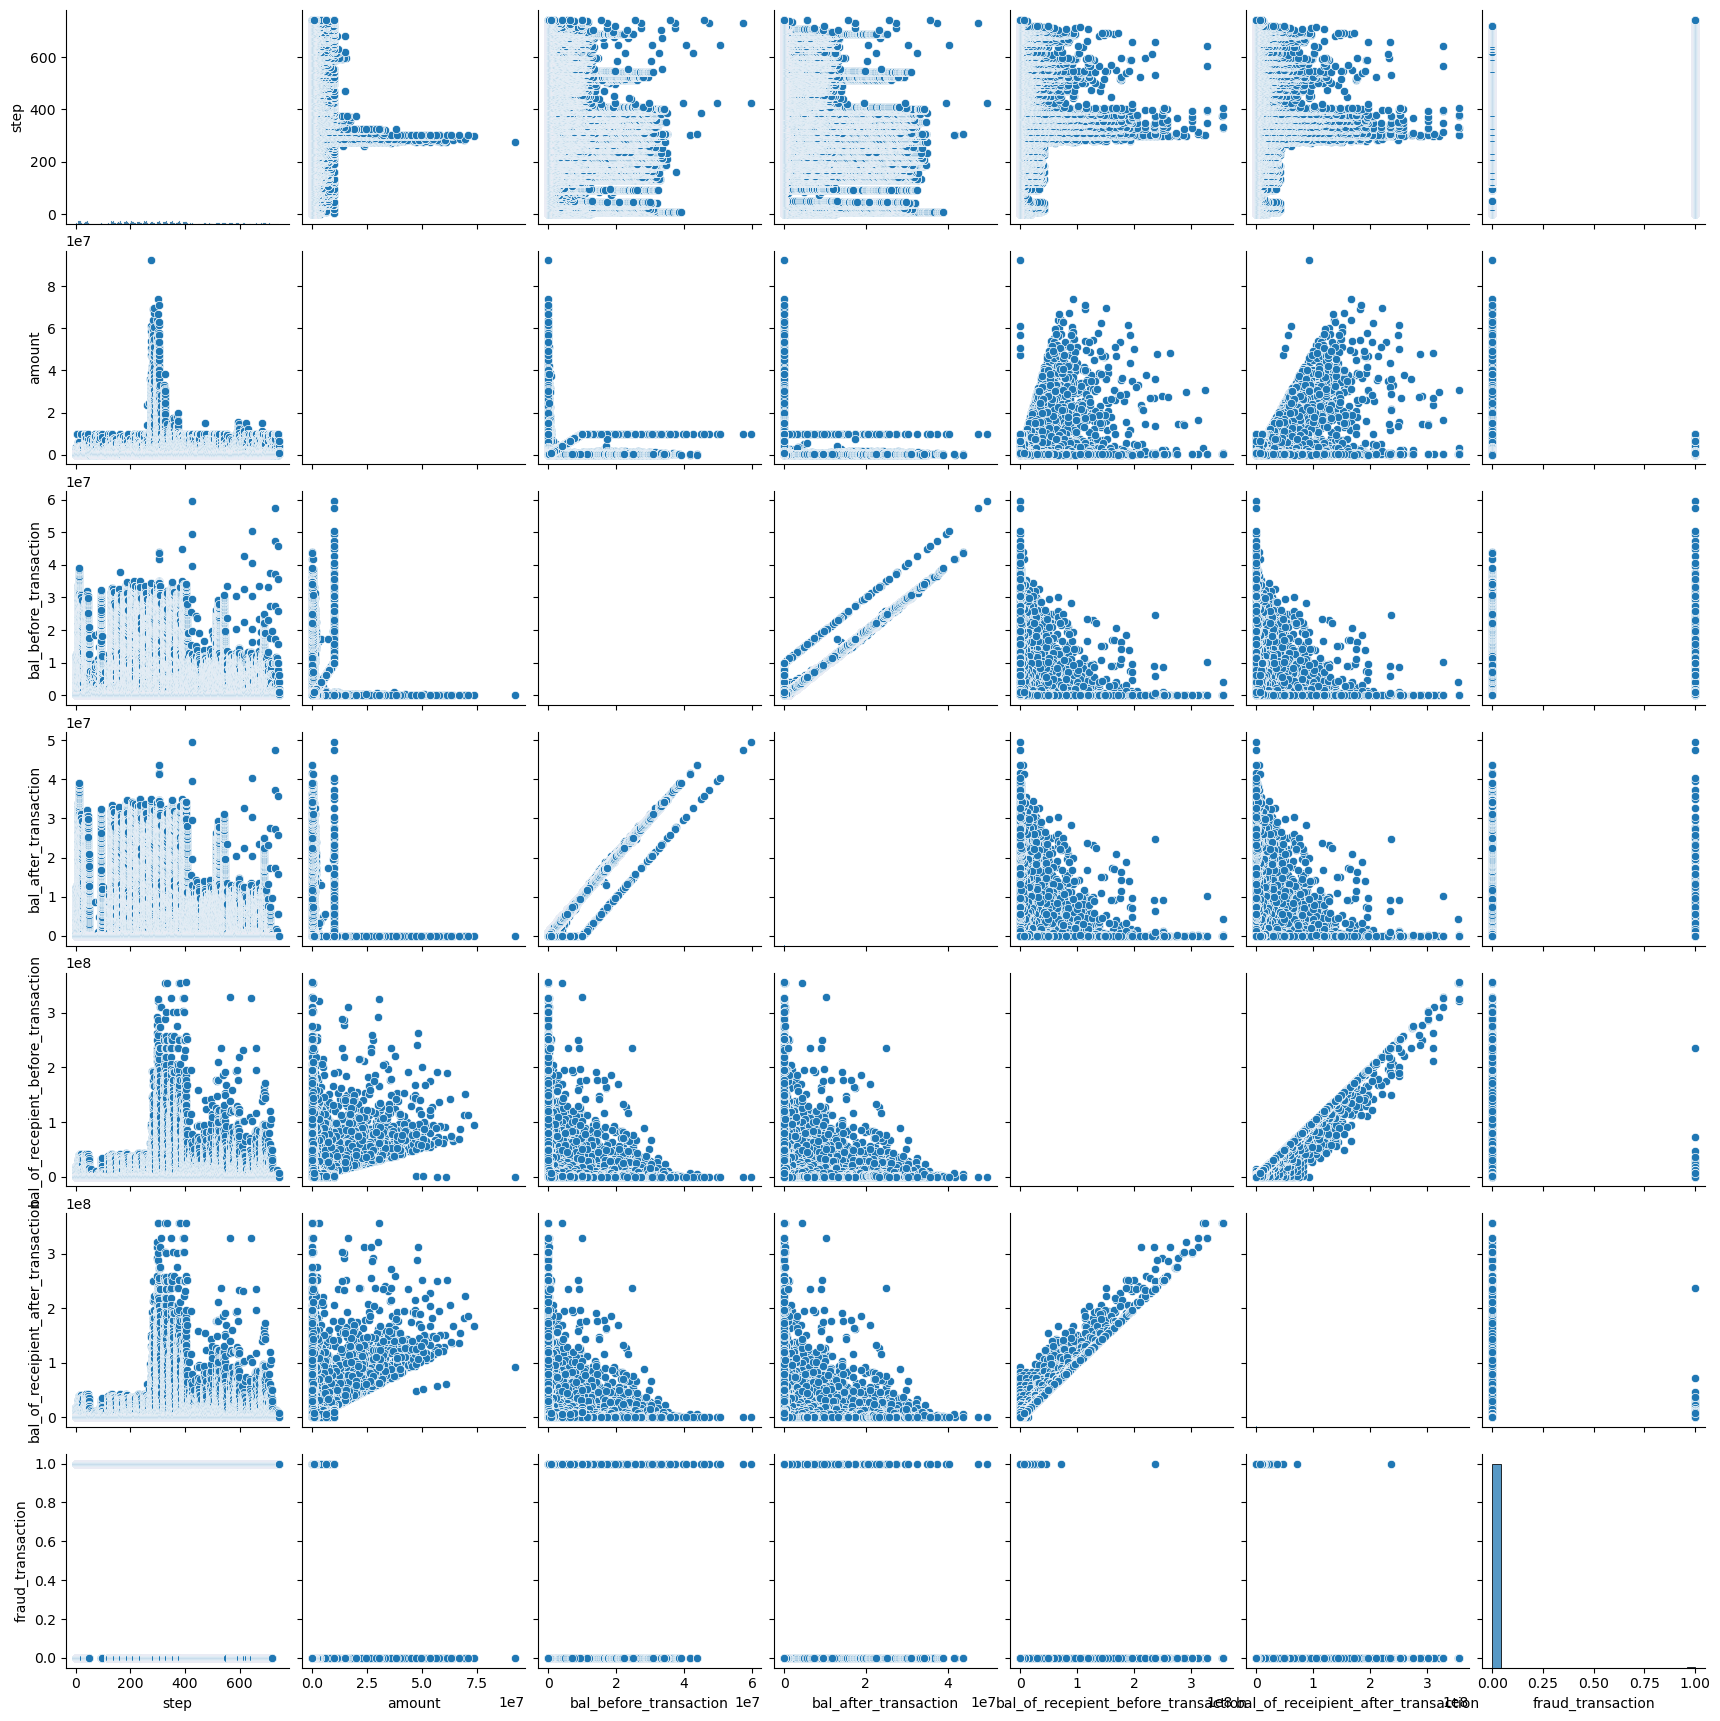

In [40]:
sns.pairplot(fd)

<Axes: >

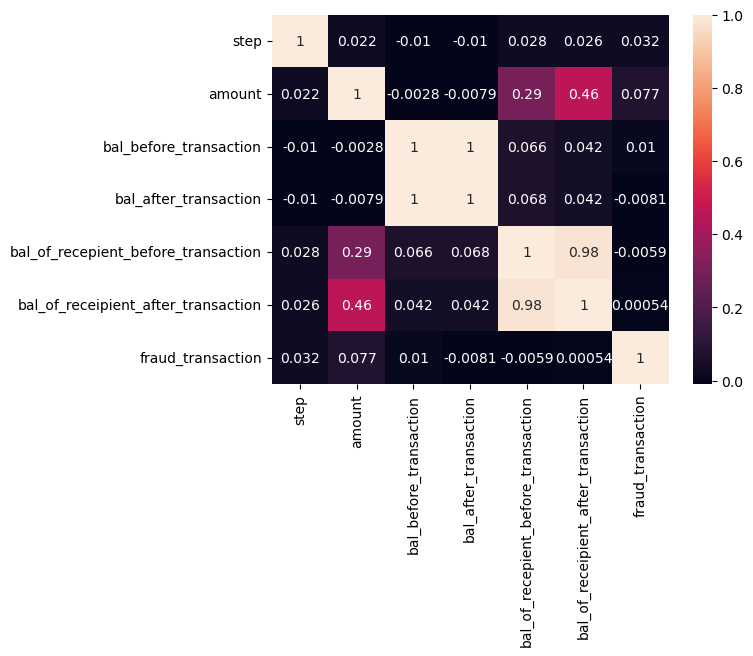

In [41]:
corel= fd.corr()
sns.heatmap(corel, annot =True)

### PERFORMING FEATURE ENGINERRING

Encoding categorical variables

In [42]:
categorical = ['type']

In [43]:
categories_dummies = pd.get_dummies(fd[categorical])

categories_dummies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [44]:
fd = pd.concat([fd,categories_dummies], axis=1)

print(fd.shape)
fd.head()

(6362620, 16)


,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,fraud_transaction_label,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,not Fraudulent,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,not Fraudulent,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraudulent,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraudulent,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,not Fraudulent,0,0,0,1,0


In [45]:
fd.drop(categorical, axis = 1, inplace = True)

fd.drop(columns=['fraud_transaction_label', 'customer_starting_transaction', 'recipient_of_transaction'], inplace=True)


In [46]:
fd.head()

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


### Model Selection, Training and Validation

### Select Target


In [47]:
y = fd.fraud_transaction

### Selecting Features

In [48]:
X = fd.drop(['fraud_transaction'], axis = 1)

In [49]:
X

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,0,1,0,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,0,0,0,0,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,1,0,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,0,0,0,0,1


### Import ML algorithms and initialize them

In [50]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [52]:
LR = LogisticRegression(random_state=42)
KN = KNeighborsClassifier()
DC = DecisionTreeClassifier(random_state=42)
RF = RandomForestClassifier(random_state=42)


In [53]:
models = [LR,KN,DC,RF]

In [54]:
def plot_confusion_matrix(y_test,prediction):
    cm_ = confusion_matrix(y_test,prediction)
    plt.figure(figsize = (6,4))
    sns.heatmap(cm_, cmap ='coolwarm', linecolor = 'white', linewidths = 1, annot = True, fmt = 'd')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
#create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_test,y_test):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(y_test, prediction)) #use this later
    plot_confusion_matrix(y_test,prediction)



For LogisticRegression, Accuracy score is 0.9981289154467814 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270870
           1       0.34      0.49      0.40      1654

    accuracy                           1.00   1272524
   macro avg       0.67      0.74      0.70   1272524
weighted avg       1.00      1.00      1.00   1272524



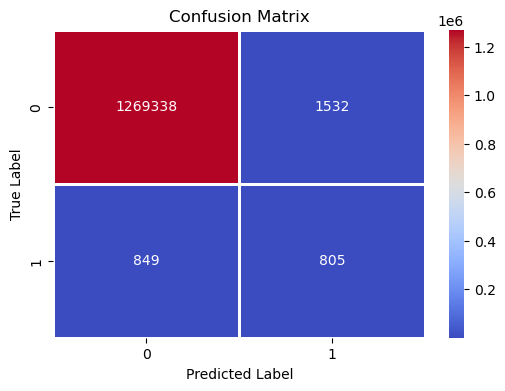


For KNeighborsClassifier, Accuracy score is 0.999444411264542 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270870
           1       0.87      0.68      0.76      1654

    accuracy                           1.00   1272524
   macro avg       0.93      0.84      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524



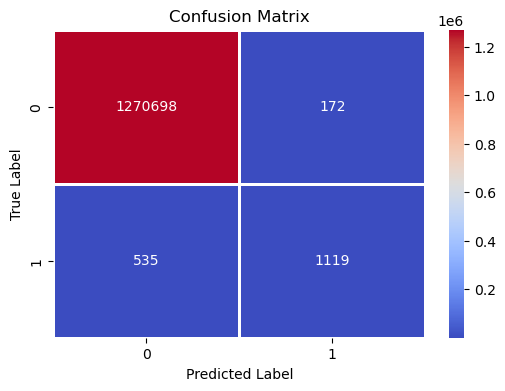


For DecisionTreeClassifier, Accuracy score is 0.9996966658389154 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270870
           1       0.89      0.87      0.88      1654

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



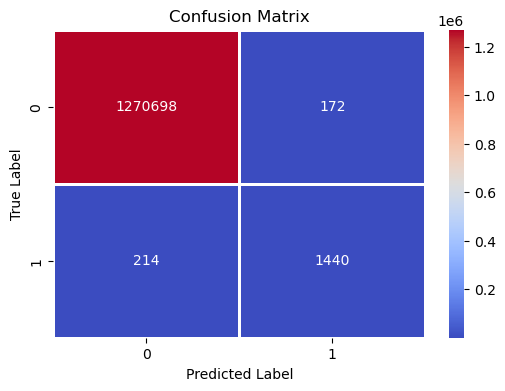


For RandomForestClassifier, Accuracy score is 0.9997037383970754 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270870
           1       0.98      0.79      0.87      1654

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



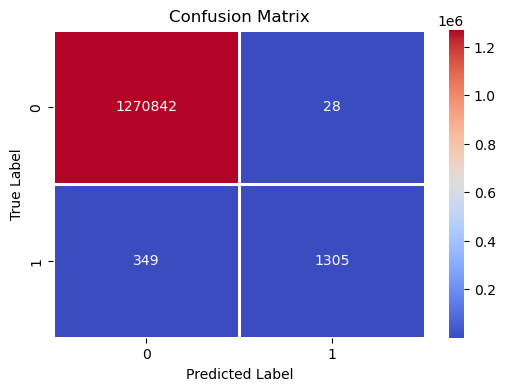

In [57]:
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)
    

### Cross Validation

In [58]:
# Importing the library to perform cross-validation
from sklearn.model_selection import cross_validate

# Running the cross-validation on both Decision Tree and Random Forest models; specifying recall as the scoring metric
DC_scores = cross_validate(DC, X_test, y_test, scoring='recall_macro')
RF_scores = cross_validate(RF, X_test, y_test, scoring='recall_macro')

# Printing the means of the cross-validations for both models
print('Decision Tree Recall Cross-Validation:', np.mean(DC_scores['test_score']))
print('Random Forest Recall Cross-Validation:', np.mean(RF_scores['test_score']))

Decision Tree Recall Cross-Validation: 0.9125339527243259
Random Forest Recall Cross-Validation: 0.8754482430335159


#### Conclusion
Upon training and evaluating our classification model, we found that the Decision tree model performed the best by a narrow margin.

Therefore, Decision Tree performs best with recall cross-validation accuracy of 91% which is important for our problem statement where false negative is our priority
